# HyFI Test Notebook

This Jupyter Notebook is used to test the HyFI package. It contains examples of how to use the package and how to create a new HyFI model.


In [1]:
from hyfi.main import HyFI

INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks


INFO:hyfi.graphics.collage:Creating collage of 2 images with 2 columns from 2 images


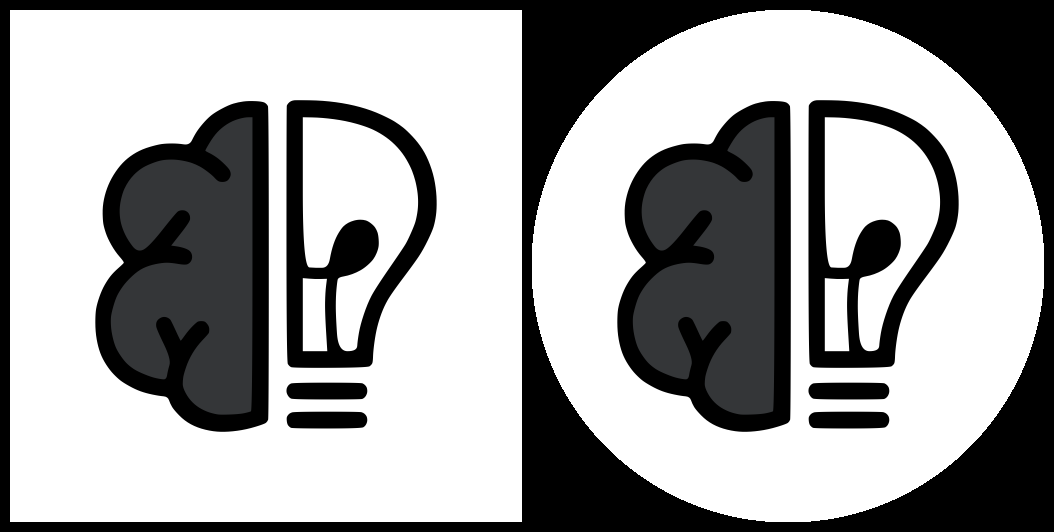

In [2]:
url = "https://assets.entelecheia.ai/logo-square-512.png"
url2 = "https://assets.entelecheia.ai/logo-circle-512.png"

img = HyFI.load_image(url)
img2 = HyFI.load_image(url2)

cimg = HyFI.collage([img, img2], cols=2)
cimg.image

INFO:hyfi.graphics.motion:Making GIF from 
INFO:hyfi.graphics.motion:Skipping GIF creation, already exists: test.gif
INFO:hyfi.graphics.motion:If you want to re-create the GIF, set force=True


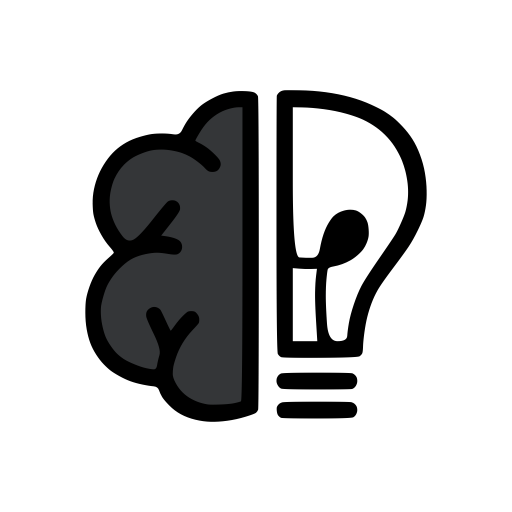

'test.gif'

In [3]:
url = "https://assets.entelecheia.ai/logo-square-512.png"
url2 = "https://assets.entelecheia.ai/logo-circle-512.png"

HyFI.make_gif([url, url2], output_filepath="test.gif", show=True)

In [4]:
HyFI.about()


name        : HyFI
authors     : Young Joon Lee <entelecheia@hotmail.com>
description : Hydra Fast Interface (Hydra and Pydantic based interface framework)
homepage    : https://hyfi.entelecheia.ai
license     : MIT
version     : 1.2.3

Execute `hyfi --help` to see what you can do with HyFI
name        : HyFI
authors     : Young Joon Lee <entelecheia@hotmail.com>
description : Hydra Fast Interface (Hydra and Pydantic based interface framework)
homepage    : https://hyfi.entelecheia.ai
license     : MIT
version     : 1.2.3

Execute `hyfi --help` to see what you can do with HyFI


## Check Version

Now, let's get the version of the `hyfi` package.


In [5]:
version = HyFI.__version__
print("HyFI version:", version)

HyFI version: 1.2.3
 1.2.3


In [6]:
HyFI.dotenv().model_dump()

INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks


{'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'test-project',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'INFO',
 'HYFI_VERBOSE': False,
 'HYFI_NUM_WORKERS': 1,
 'CACHED_PATH_CACHE_ROOT': '',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': '',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '',
 'WANDB_NOTEBOOK_NAME': '',
 'WANDB_SILENT': False,
 'LABEL_STUDIO_SERVER': '',
 'KMP_DUPLICATE_LIB_OK': 'True',
 'TOKENIZERS_PARALLELISM': False}

In [7]:
# Test expanding $PWD and $USER variables
posix_expr = "The system workspace root is $WORKSPACE_ROOT and the user is $USER."

expanded_expr = HyFI.expand_posix_vars(posix_expr)
print(expanded_expr)

The system workspace root is /mnt/nvme1n1p2/home/yj.lee/workspace and the user is yj.lee.



## Initialize Project

We'll initialize the project using the `HyFI.init_project` function. The function takes the following parameters:

- `project_name`: Name of the project to use.
- `project_description`: Description of the project that will be used.
- `project_root`: Root directory of the project.
- `project_workspace_name`: Name of the project's workspace directory.
- `global_hyfi_root`: Root directory of the global hyfi.
- `global_workspace_name`: Name of the global hierachical workspace directory.
- `num_workers`: Number of workers to run.
- `log_level`: Log level for the log.
- `autotime`: Whether to automatically set time and / or keep track of run times.
- `retina`: Whether to use retina or not.
- `verbose`: Enables or disables logging

We'll check if we're running in Google Colab, and if so, we'll mount Google Drive.


In [8]:
if HyFI.is_colab():
    HyFI.mount_google_drive()

prj = HyFI.init_project(
    project_name="hyfi",
    log_level="DEBUG",
    verbose=True,
)

print("Project directory:", prj.root_dir)
print("Workspace directory:", prj.workspace_dir)

INFO:hyfi.utils.notebooks:Google Colab not detected.
INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:hyfi.core.config:HyFiConfig initialized with hyfi_config_module=hyfi.conf, hyfi_config_path=pkg://hyfi.conf, hyfi_user_config_path=.
INFO:hyfi.composer:Composing `ProjectConfig` class with `__init__` config in `project` group.
DEBUG:hydra.core.utils:Setting JobRuntime:name=UNKNOWN_NAME
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks
INFO:hyfi.composer:Composing `JobLibConfig` class with `__init__` config in `joblib` group.
DEBUG:hydra.core.utils:Setting JobRunt

DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
INFO:hyfi.composer:Composing `PathConfig` class with `__init__` config in `path` group.
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks
INFO:hyfi.joblib:initialized batcher with <hyfi.joblib.batch.batcher.Batcher object at 0x7f41da7f4220>


Project directory: /home/yj.lee/.hyfi/workspace/projects/hyfi
Workspace directory: /home/yj.lee/.hyfi/workspace/projects/hyfi/workspace
time: 1 s (started: 2023-07-14 19:58:33 +09:00)
 /home/yj.lee/.hyfi/workspace/projects/hyfi
Workspace directory: /home/yj.lee/.hyfi/workspace/projects/hyfi/workspace
time: 1 s (started: 2023-07-14 19:58:33 +09:00)


In [9]:
prj.dotenv.model_dump()

{'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '/home/yj.lee/.hyfi',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'hyfi',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'DEBUG',
 'HYFI_VERBOSE': False,
 'HYFI_NUM_WORKERS': -1,
 'CACHED_PATH_CACHE_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/.cache/cached_path',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': '',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '',
 'WANDB_NOTEBOOK_NAME': '',
 'WANDB_SILENT': 'False',
 'LABEL_STUDIO_SERVER': '',
 'KMP_DUPLICATE_LIB_OK': 'True',
 'TOKENIZERS_PARALLELISM': 'False'}

time: 2.06 ms (started: 2023-07-14 19:58:34 +09:00)



In [10]:
HyFI.dotenv().model_dump()

INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks


{'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '/home/yj.lee/.hyfi',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'hyfi',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'DEBUG',
 'HYFI_VERBOSE': 'False',
 'HYFI_NUM_WORKERS': -1,
 'CACHED_PATH_CACHE_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/.cache/cached_path',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': '',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '',
 'WANDB_NOTEBOOK_NAME': '',
 'WANDB_SILENT': 'False',
 'LABEL_STUDIO_SERVER': '',
 'KMP_DUPLICATE_LIB_OK': 'True',
 'TOKENIZERS_PARALLELISM': 'False'}

time: 20.4 ms (started: 2023-07-14 19:58:34 +09:00)



## Compose Configuration

We can use the `HyFI.compose` function to load a configuration file. In this example, we'll use the default configuration by specifying `path=__task__`.


In [11]:
cfg = HyFI.compose("path=__task__")

DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app


time: 190 ms (started: 2023-07-14 19:58:34 +09:00)



## Display Configuration

Now, let's print the loaded configuration using the `HyFI.print` function.


In [12]:
HyFI.print(cfg)

{'dirnames': {'archive': 'archive',
              'cache': '.cache',
              'config_dirname': 'configs',
              'config_json': 'config.json',
              'config_yaml': 'config.yaml',
              'datasets': 'datasets',
              'inputs''dirnames': {'archive': 'archive',
              'cache': '.cache',
              'config_dirname': 'configs',
              'config_json': 'config.json',
              'config_yaml': 'config.yaml',
              'datasets': 'datasets',
              'inputs': 'inputs',
              'library': 'libs',
              'logs': 'logs',
              'models': 'models',
              'modules': 'modules',
              'outputs': 'outputs',
              'tmp': 'tmp'},
 'task_name': 'demo-task',
 'task_root': 'workspace/tasks'}
time: 22.6 ms (started: 2023-07-14 19:58:34 +09:00)


In [14]:
HyFI.find_dotenv()

INFO:hyfi.utils.envs:Trying to find .env in /mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/tests/notebooks


'/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env'

time: 2.88 ms (started: 2023-07-14 20:06:04 +09:00)

